# Challenger USA Space Shuttle O-Ring Data Set

__[Project Data Set Source](https://archive.ics.uci.edu/ml/datasets/Challenger+USA+Space+Shuttle+O-Ring)__


<img src="images/Challenger.jpg" />


**Abstract & Task:** predict the number of O-rings that experience thermal distress on a flight at 31 degrees F given data on the previous 23 shuttle flights.


|                               |            |                          |  |                  |           |
|-------------------------------|------------|--------------------------|--|------------------|-----------|
|**Data Set Characteristics:**  |Multivariate|**Number of Instances:**  |23|**Area:**         |Physical   |
|**Attribute Characteristics:** |Integer     |**Number of Attributes:** |4 |**Date Donated:** |1993-08-05 |
|**Associated Tasks:**          |Regression  |**Missing Vales?**        |No|**Number of Hits**|90012      |


## Source:

**Original Owner:**

    David Draper (draper '@' math.ucla.edu)
    University of California, Los Angeles

**Donor:**

    David Draper (draper '@' math.ucla.edu)

## Data Set Information

**There are two databases (both use the same set of 5 attributes):**

    1. Primary o-ring erosion and/or blowby
    2. Primary o-ring erosion only

***The two databases are identical except for the 2nd attribute of the 21st instance (confirmed by David Draper on
8/5/93).***

***Edited from (Draper, 1993):***

The motivation for collecting this database was the explosion of the USA Space Shuttle Challenger on 28 January, 1986. An investigation ensued into the reliability of the shuttle's propulsion system. The explosion was eventually traced to the failure of one of the three field joints on one of the two solid booster rockets. Each of these six field joints includes two O-rings, designated as primary and secondary, which fail when phenomena called erosion and blowby both occur.

The night before the launch a decision had to be made regarding launch safety. The discussion among engineers and managers leading to this decision included concern that the probability of failure of the O-rings depended on the temperature t at launch, which was forecasted to be 31 degrees F. There are strong engineering reasons based on the composition of O-rings to support the judgment that failure probability may rise monotonically as temperature drops. One other variable, the pressures at which safety testing for field join leaks was performed, was available, but its relevance to the failure process was unclear.

Draper's paper includes a menacing figure graphing the number of field joints experiencing stress vs. liftoff temperature for the 23 shuttle flights previous to the Challenger disaster. No previous liftoff temperature was under 53 degrees F. Although tremendous extrapolation must be done from the given data to assess risk at 31 degrees F, it is obvious even to the layman "to foresee the unacceptably high risk created by launching at 31 degrees F." For more information, see Draper (1993) or the other previous analyses.

***The task is to predict the number of O-rings that will experience thermal distress for a given flight when the launch temperature is below freezing.***

## Attribute Information:

    1. Number of O-rings at risk on a given flight
    2. Number experiencing thermal distress
    3. Launch temperature (degrees F)
    4. Leak-check pressure (psi)
    5. Temporal order of flight

## Relevant Papers:

    Draper,D. (1993). Assessment and propagation of model uncertainty. In Proceedings of the Fourth International
    Workshop on Artificial Intelligence and Statistics (pp. 497--509). Ft. Lauderdale, FL: Unpublished.

    Dalal,S.R., Fowlkes,E.B., & Hoadley,B. (1989). Risk analysis of the space shuttle: pre-Challenger prediction of
    failure. Journal of the American Statisticians Association, 84, 945--957.

    Lavine,M. (1991). Problems in extrapolation illustrated with space shuttle O-ring data. Journal of the American
    Statisticians Association, 86, 919--922.

    Martz H.F., & Zimmer, W.J. (1992). The risk of catastrophic failure of the solid rocket boosters on the space
    shuttle. American Statistics, 46, 42--47.

## Data Set:

In [5]:
import numpy
import pandas
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pandas.read_csv("data\o-ring-erosion-onlyData", header = None)

data.columns = ["Number of O-rings at risk on a given flight", 
                "Number experiencing thermal distress", 
                "Launch temperature (degrees F)", 
                "Leak-check pressure (psi)", 
                "Temporal order of flight"]

data

,Number of O-rings at risk on a given flight,Number experiencing thermal distress,Launch temperature (degrees F),Leak-check pressure (psi),Temporal order of flight
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5
5,6,0,72,50,6
6,6,0,73,100,7
7,6,0,70,100,8
8,6,1,57,200,9
9,6,1,63,200,10


In [6]:
data.drop(["Number of O-rings at risk on a given flight", 
           "Temporal order of flight"], axis = 1, inplace = True)

## Reduced Data Set:

In [7]:
data

,Number experiencing thermal distress,Launch temperature (degrees F),Leak-check pressure (psi)
0,0,66,50
1,1,70,50
2,0,69,50
3,0,68,50
4,0,67,50
5,0,72,50
6,0,73,100
7,0,70,100
8,1,57,200
9,1,63,200


## Data Set Stats:

In [8]:
data.describe()

,Number experiencing thermal distress,Launch temperature (degrees F),Leak-check pressure (psi)
count,23.000000,23.000000,23.000000
mean,0.304348,69.565217,152.173913
std,0.558796,7.057080,68.221332
min,0.000000,53.000000,50.000000
25%,0.000000,67.000000,75.000000
50%,0.000000,70.000000,200.000000
75%,0.500000,75.000000,200.000000
max,2.000000,81.000000,200.000000


## Thermal Distress Heat Map:

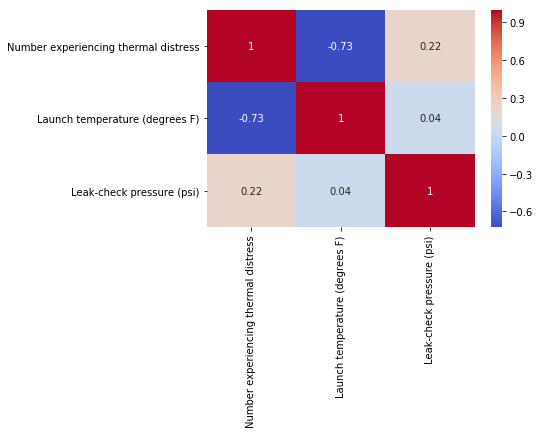

In [10]:
cor = data.corr()
sb.heatmap(cor, annot = True, cmap = "coolwarm")

## Distribution of Thermal Distress Events

c:\program files\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


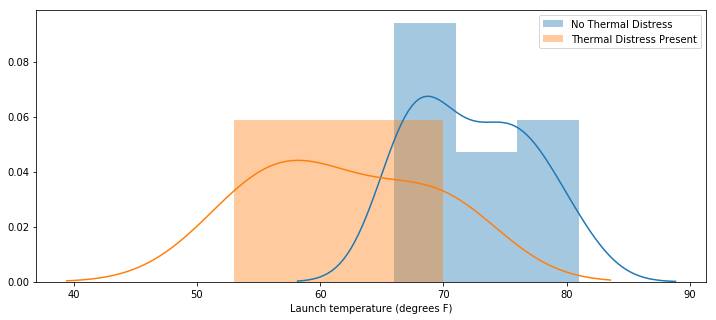

In [11]:
plt.figure(figsize = (12,5))

sb.distplot(data["Launch temperature (degrees F)"][data["Number experiencing thermal distress"] == 0], 
            label = "No Thermal Distress")

sb.distplot(data["Launch temperature (degrees F)"][data["Number experiencing thermal distress"] != 0], 
            label = "Thermal Distress Present")

plt.legend()
plt.show()

In [12]:
xData = data.drop(["Number experiencing thermal distress"], axis = 1)
yData = data["Number experiencing thermal distress"]

## Define & Train a Thermal Distress Model

In [13]:
# Use sklearn and create a LinearRegression Object
alg = LinearRegression()

In [14]:
# Train the algorithm
alg.fit(xData, yData)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Predict Thermal Distress

At 31 degrees F the Linear Regression model predicts that ***2.546 O-Rings*** will experience Thermal Distress that may lead to failure as was the case during the Space Shuttle Challenger Mission when launch temperatures t were predicted at 31 degrees F.

In [15]:
# Make prediction
alg.predict(numpy.array([31,150]).reshape(1,2))

array([2.54622366])